### Networkx Examples

On this page, we visualize several examples of `networkx` graphs as hive plots.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from hiveplotlib import hive_plot_n_axes
from hiveplotlib.converters import networkx_to_nodes_edges
from hiveplotlib.node import split_nodes_on_variable
from hiveplotlib.viz import hive_plot_viz

#### Tripartite Graph

By definition, a multipartite graph should not have _any_ connections within a group. This is easy to visualize by drawing a hive plot with repeat axes.

In [2]:
G = nx.complete_multipartite_graph(10, 10, 10)

In [3]:
nodes, edges = networkx_to_nodes_edges(G)

# split node IDs into separate lists based on which "subset" they're in
node_split = split_nodes_on_variable(nodes, variable_name="subset")
splits = list(node_split.values())

# not concerned with on-axis patterns, place nodes on axes randomly
rng = np.random.default_rng(0)
for node in nodes:
    node.add_data(data={"val": rng.uniform()})

In [4]:
hp = hive_plot_n_axes(
    node_list=nodes,
    edges=edges,
    axes_assignments=node_split.values(),
    sorting_variables=["val"] * 3,
    repeat_axes=[True] * 3,
)

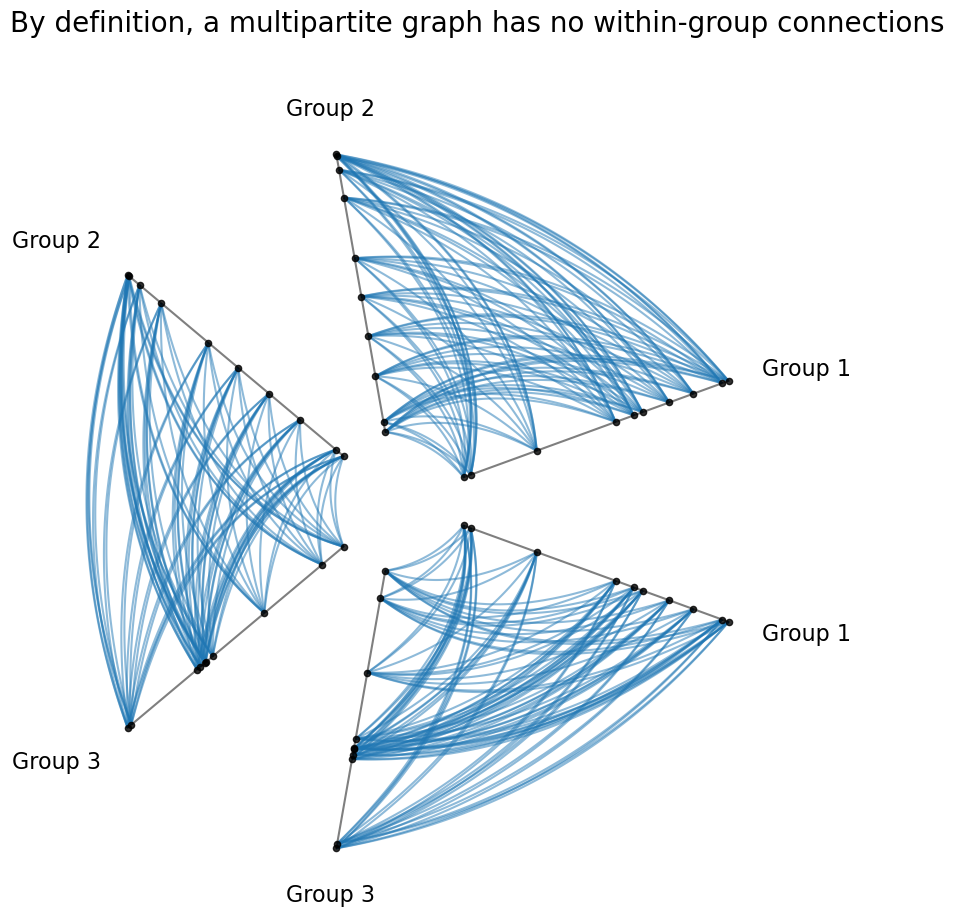

In [5]:
fig, ax = hive_plot_viz(hp, color="C0")
ax.set_title(
    "By definition, a multipartite graph has no within-group connections",
    y=1.1,
    size=20,
    x=0,
    ha="left",
)
plt.show()

#### Ring of Cliques

By construction, the ring of cliques graph are fully connected intra-group, with a _single_ connection between each group.

In [6]:
rng = np.random.default_rng(0)
G = nx.ring_of_cliques(num_cliques=3, clique_size=10)

In [7]:
nodes, edges = networkx_to_nodes_edges(G)

# not concerned with on-axis patterns, place nodes on axes randomly
rng = np.random.default_rng(0)
for node in nodes:
    node.add_data(data={"val": rng.uniform()})

`networkx` generates the groups in order, so the first 10 node IDs are in the first clique, then the next 10 are in the second clique, and the last 10 are in the third clique. There is no underlying data in the resulting nodes generated by the `networkx` graph for us to split on, so we will manually generate the separate lists of node IDs with `numpy`.

In [8]:
splits = np.split(np.arange(30), 3)

In [9]:
hp = hive_plot_n_axes(
    node_list=nodes,
    edges=edges,
    axes_assignments=splits,
    sorting_variables=["val"] * 3,
    repeat_axes=[True] * 3,
    all_edge_kwargs={"color": "C0", "lw": 4},
    repeat_edge_kwargs={"color": "darkgrey", "lw": 1},
)

/tmp/ipykernel_349524/1312660954.py:1: UserWarning: Specified kwarg color in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(
/tmp/ipykernel_349524/1312660954.py:1: UserWarning: Specified kwarg lw in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(
/tmp/ipykernel_349524/1312660954.py:1: UserWarning: Specified kwarg color in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(
/tmp/ipykernel_349524/1312660954.py:1: UserWarning: Specified kwarg lw in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes

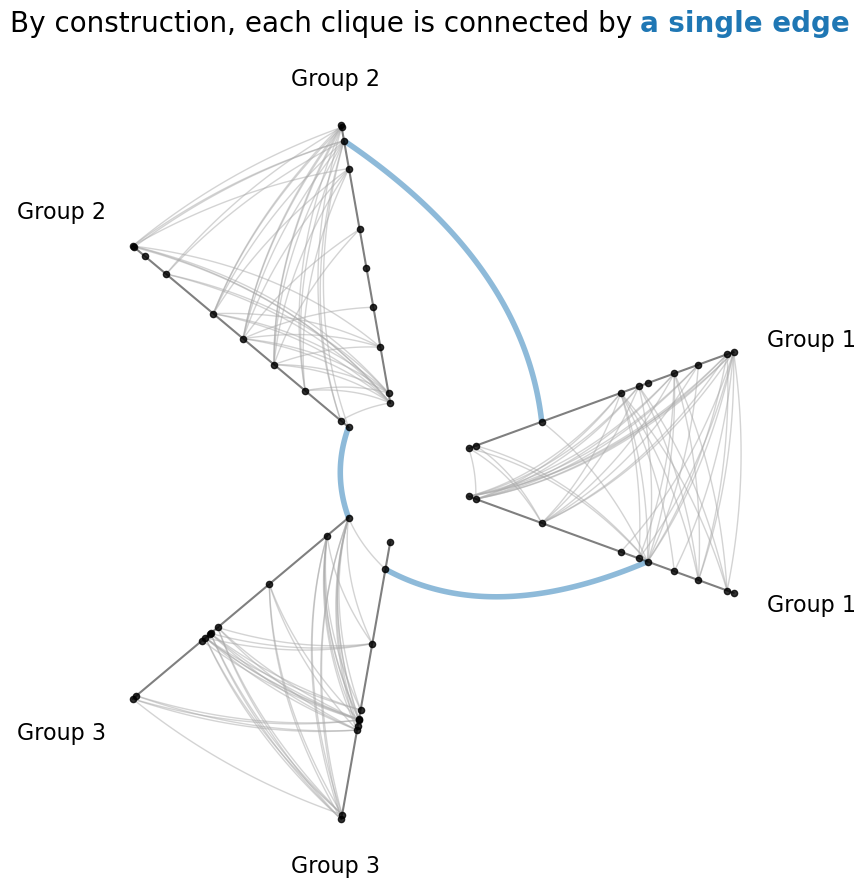

In [10]:
fig, ax = hive_plot_viz(hp)

fig.text(
    0.12,
    0.93,
    "By construction, each clique is connected by",
    ha="left",
    va="bottom",
    fontsize=20,
    color="black",
)
fig.text(
    0.75,
    0.93,
    "a single edge",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="C0",
)

plt.show()

#### Stochastic Block Model

Asymmetric relationships between groups can be well-represented with hive plots.

Note, we cover this example in more detail in the [Quick Hive Plots notebook](https://geomdata.gitlab.io/hiveplotlib/quick_hive_plots.html).

In [11]:
G = nx.stochastic_block_model(
    sizes=[10, 10, 10],
    p=[[0.1, 0.5, 0.5], [0.05, 0.1, 0.2], [0.05, 0.2, 0.1]],
    directed=True,
    seed=0,
)

Above, we have generated 3 cliques of equal size (10 per clique) with the following properties:

* Within-group communication is only 10% (`0.1` on the diagonal).
* Group 1 is very social with Groups 2 and 3 (`0.5`), but Groups 2 and 3 aren't very social with Group 1 (`0.05`).
* Group 2 and Group 3 are relatively social with each other (`0.2`).

In [12]:
nodes, edges = networkx_to_nodes_edges(G)

# split node IDs into separate lists based on which "block" they're in
blocks_dict = split_nodes_on_variable(nodes, variable_name="block")
splits = list(blocks_dict.values())

# not concerned with on-axis patterns, place nodes on axes randomly
rng = np.random.default_rng(0)
for node in nodes:
    node.add_data(data={"val": rng.uniform()})

In [13]:
hp = hive_plot_n_axes(
    node_list=nodes,
    edges=edges,
    axes_assignments=splits,
    sorting_variables=["val"] * 3,
    repeat_axes=[True, True, True],
    all_edge_kwargs={"color": "C1", "alpha": 1},
    repeat_edge_kwargs={"color": "darkgrey"},
)

/tmp/ipykernel_349524/576324277.py:1: UserWarning: Specified kwarg color in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(
/tmp/ipykernel_349524/576324277.py:1: UserWarning: Specified kwarg color in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(
/tmp/ipykernel_349524/576324277.py:1: UserWarning: Specified kwarg color in `all_edge_kwargs` but already set as kwarg for edge set index 0 with `edge_list_kwargs` or `repeat_edge_kwargs`. Disregarding `all_edge_kwargs` here.
  hp = hive_plot_n_axes(


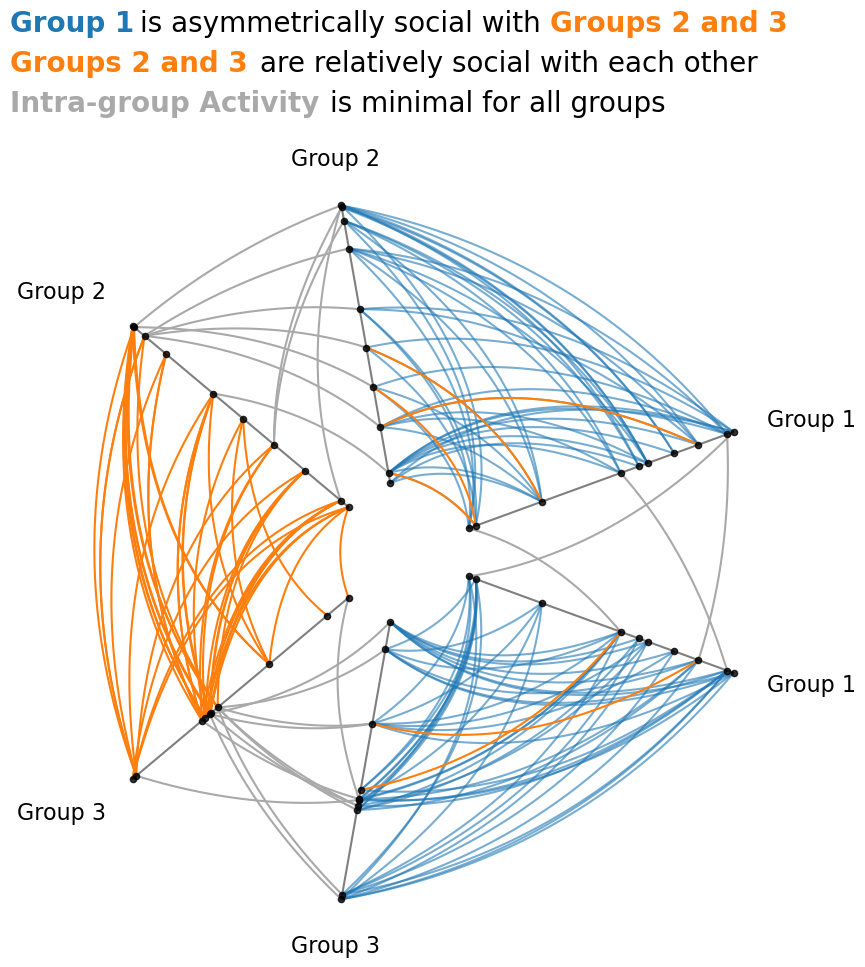

In [14]:
# make all the edges of interest blue (C0)
#  make more transparant (lots of edges)
#  and place these edges *behind* orange edges (zorder)
hp.add_edge_kwargs(
    axis_id_1="Group 1_repeat",
    axis_id_2="Group 2",
    a2_to_a1=False,
    color="C0",
    alpha=0.6,
    zorder=-1,
)
hp.add_edge_kwargs(
    axis_id_1="Group 1",
    axis_id_2="Group 3_repeat",
    a2_to_a1=False,
    color="C0",
    alpha=0.6,
    zorder=-1,
)

fig, ax = hive_plot_viz(hp)

fig.text(
    0.12,
    1.01,
    "Group 1",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="C0",
)
fig.text(
    0.25,
    1.01,
    "is asymmetrically social with",
    ha="left",
    va="bottom",
    fontsize=20,
    color="black",
)
fig.text(
    0.66,
    1.01,
    "Groups 2 and 3",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="C1",
)

fig.text(
    0.12,
    0.97,
    "Groups 2 and 3",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="C1",
)
fig.text(
    0.37,
    0.97,
    "are relatively social with each other",
    ha="left",
    va="bottom",
    fontsize=20,
    color="black",
)

fig.text(
    0.12,
    0.93,
    "Intra-group Activity",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="darkgrey",
)
fig.text(
    0.44,
    0.93,
    "is minimal for all groups",
    ha="left",
    va="bottom",
    fontsize=20,
    color="black",
)

plt.show()